## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [6]:
!head Data/countries_info.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [8]:
# Load datasets
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

# Clean up literacy (comma decimal separator) and types (robust to missing values)
import numpy as np
countries['literacy'] = pd.to_numeric(
    countries['literacy'].astype(str).str.replace(',', '.', regex=False),
    errors='coerce'
)

# Normalize country names to join reliably
normalize = lambda s: str(s).strip().lower()
happiness['country_key'] = happiness['country'].apply(normalize)
countries['country_key'] = countries['country_name'].apply(normalize)

# Preview
display(happiness.head())
display(countries.head())

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_key
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia


,country_name,area,population,literacy,country_key
0,afghanistan,647500,31056997,36.0,afghanistan
1,albania,28748,3581655,86.5,albania
2,algeria,2381740,32930091,70.0,algeria
3,argentina,2766890,39921833,97.1,argentina
4,armenia,29800,2976372,98.6,armenia


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [9]:
# Merge happiness (left) with countries on normalized key
country_features = happiness.merge(
    countries.drop(columns=['country_name']),
    on='country_key', how='left', validate='m:1'
)
print(f"Rows in happiness: {len(happiness)}, rows after merge: {len(country_features)}")
display(country_features.head())

Rows in happiness: 135, rows after merge: 135


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_key,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,98.6


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [10]:
# Top 10 countries by happiness score
_top10 = happiness.sort_values('happiness_score', ascending=False)[['country', 'happiness_score']].head(10)
display(_top10.reset_index(drop=True))

,country,happiness_score
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880
5,Netherlands,7.4489
6,Sweden,7.3535
7,New Zealand,7.2996
8,Austria,7.2942
9,Luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [11]:
# Average happiness and count by world region
region_stats = (
    happiness
    .groupby('world_region')
    .agg(avg_happiness=('happiness_score', 'mean'), num_countries=('country', 'nunique'))
    .sort_values('avg_happiness', ascending=False)
    .reset_index()
)
display(region_stats)

,world_region,avg_happiness,num_countries
0,North America and ANZ,7.173525,4
1,Western Europe,6.967405,20
2,Latin America and Caribbean,5.971280,20
3,Central and Eastern Europe,5.891393,14
4,Southeast Asia,5.517788,8
5,East Asia,5.483633,3
6,Commonwealth of Independent States,5.358342,12
7,Middle East and North Africa,5.269306,16
8,Sub-Saharan Africa,4.393856,32
9,South Asia,4.355083,6


The first region has only a few countries! What are them and what is their score?

In [12]:
# Countries and scores in the top region
_top_region = region_stats.iloc[0]['world_region']
print(f"Region: {_top_region}")
_top_region_countries = (
    happiness.loc[happiness['world_region'] == _top_region, ['country', 'happiness_score']]
    .sort_values('happiness_score', ascending=False)
    .reset_index(drop=True)
)
display(_top_region_countries)

Region: North America and ANZ


,country,happiness_score
0,New Zealand,7.2996
1,Canada,7.2321
2,Australia,7.2228
3,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [13]:
# Countries with 100% literacy
_full_lit = (
    country_features.loc[country_features['literacy'] == 100.0, ['world_region', 'country', 'happiness_score']]
    .sort_values(['world_region', 'country'])
)
for _, r in _full_lit.iterrows():
    print(f"{r['world_region']} - {r['country']} ({r['happiness_score']})")

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [14]:
# Global average literacy (simple mean across countries)
_avg_lit = countries['literacy'].dropna().mean()
print(f"Global average literacy: {_avg_lit:.2f}%")

Global average literacy: 81.85%


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [15]:
# Proportion of countries with literacy below 50%
mask = countries['literacy'].notna()
prop_below_50 = (countries.loc[mask, 'literacy'] < 50).mean() * 100
print(f"Countries with literacy < 50%: {prop_below_50:.2f}%")

Countries with literacy < 50%: 12.03%


Print the raw number and the percentage of world population that is illiterate.

In [16]:
# World population that is illiterate (raw and percentage)
_pop_lit = countries[['population', 'literacy']].dropna()
illiterate_raw = (_pop_lit['population'] * (1 - _pop_lit['literacy'] / 100.0)).sum()
total_pop = _pop_lit['population'].sum()
illiterate_pct = (illiterate_raw / total_pop) * 100
print(f"Illiterate people (raw): {int(illiterate_raw):,}".replace(',', ' '))
print(f"Illiterate people (%): {illiterate_pct:.2f}%")

Illiterate people (raw): 1 249 372 988
Illiterate people (%): 20.35%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [17]:
# Add population density
country_features['population_density'] = country_features['population'] / country_features['area']
display(country_features[['country', 'population', 'area', 'population_density']].head())

,country,population,area,population_density
0,Afghanistan,31056997,647500,47.964474
1,Albania,3581655,28748,124.587971
2,Algeria,32930091,2381740,13.826065
3,Argentina,39921833,2766890,14.428413
4,Armenia,2976372,29800,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [18]:
# Happiness scores of the 3 countries with lowest population density
_lowest_density = (
    country_features.sort_values('population_density', ascending=True)[['country', 'population_density', 'happiness_score']]
    .head(3)
    .reset_index(drop=True)
)
display(_lowest_density)

,country,population_density,happiness_score
0,Mongolia,1.810751,5.4562
1,Australia,2.636201,7.2228
2,Botswana,2.731371,3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

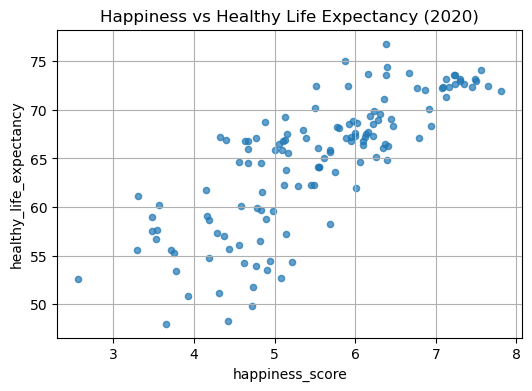

In [19]:
# Scatter: happiness vs healthy life expectancy
import matplotlib.pyplot as plt
ax = happiness.plot.scatter(
    x='happiness_score', y='healthy_life_expectancy', alpha=0.7,
    grid=True, figsize=(6, 4),
    title='Happiness vs Healthy Life Expectancy (2020)'
)
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.